In [8]:
import nltk
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize,PorterStemmer
import re
import string
import matplotlib.pyplot as plt

## Places Recommender

#### Reading Data

In [9]:
places = pd.read_csv('../datasets/places_dataset.csv')

In [10]:
places.head()

,city,id,name,rate,kinds,distance,coordinates
0,istanbul,N3236233297,Column of Marcian,3,"historic,monuments_and_memorials,burial_places...",185.407919,"{41.015442, 28.950285}"
1,istanbul,W329094469,Amcazade Külliyesi,1,"museums,cultural,interesting_places,other_museums",245.723456,"{41.015182, 28.951982}"
2,istanbul,W329089871,Aziz Mahmud Hudayi Vakfi Gazanfer Ağa Medreses...,1,"museums,cultural,interesting_places,other_museums",559.777594,"{41.016342, 28.955437}"
3,istanbul,W314677393,Reşat Nuri Sahnesi (Tiyatrosu),1,"cultural,theatres_and_entertainments,interesti...",596.409402,"{41.015846, 28.956236}"
4,istanbul,Q776353,Column of Arcadius,3,"historic,cultural,urban_environment,monuments_...",868.591827,"{41.007801, 28.9431}"


In [11]:
places.describe()

,rate,distance
count,107675.000000,107675.000000
mean,2.155979,61945.503180
std,1.995000,109206.215014
min,1.000000,0.099657
25%,1.000000,3832.815904
50%,1.000000,17568.157101
75%,3.000000,74252.355973
max,7.000000,997251.413754


In [12]:
cities_set = set(places['city'])
cities_list = [c for c in cities_set]
places['city_id'] = places['city'].apply(lambda city: cities_list.index(city))
places['city_id']

0         57
1         57
2         57
3         57
4         57
          ..
107670    20
107671    20
107672    20
107673    20
107674    20
Name: city_id, Length: 107675, dtype: int64

In [13]:
places_features_df = pd.DataFrame(places['city_id'])
places_features_df = places_features_df.rename(index = places['name'])
places_features_df.head()

,city_id
Column of Marcian,57
Amcazade Külliyesi,57
Aziz Mahmud Hudayi Vakfi Gazanfer Ağa Medresesi Egitim ve Kultur Merkezi,57
Reşat Nuri Sahnesi (Tiyatrosu),57
Column of Arcadius,57


In [15]:
def extract_features(amenities,features) -> list:
    hotel_features = []
    col_names = pd.Index(features)
    for i,amenity in enumerate(amenities):
        if pd.notna(amenity):
            feats = amenity.split(',')
            row = np.zeros(len(features))
            for feat in feats:
                if feat != '':
                    index = np.where(col_names == feat)[0][0] #index
                    row[index] = 1
            hotel_features.append(row)
    return hotel_features


In [16]:
p_features = set()
places['kinds'].apply(lambda item: [p_features.add(x) for x in str(item).split(',')])
col_names = places_features_df.columns
places_features = extract_features(places['kinds'],p_features)

In [17]:
places_features_df = pd.DataFrame(places_features,columns=p_features)
# places_features_df.insert(loc=0,column='city_id',value=places['city_id'])
places_features_df = places_features_df.rename(index = places['name'])
places_features_df.head()

,surfing,factories,baths_and_saunas,stadiums,shops,alcohol,other_bridges,dive_spots,fountains,salt_lakes,...,bridges,crypts,synagogues,fortified_towers,necropolises,observation_towers,aquariums,resorts,aviation_museums,monuments_and_memorials
Column of Marcian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Amcazade Külliyesi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aziz Mahmud Hudayi Vakfi Gazanfer Ağa Medresesi Egitim ve Kultur Merkezi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Reşat Nuri Sahnesi (Tiyatrosu),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Column of Arcadius,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# places_corr_matrix = places_features_df.corr()
max_features = []
low_prior = []
for col in places_features_df.columns:
    col_sum = places_features_df[col].sum()
    if col_sum < 20:
        low_prior.append(col)
    else:
        max_features.append((col,col_sum))
    


In [19]:
important_places_features = pd.DataFrame(max_features) 
important_places_features.columns = ['features','sum']
important_places_features.sort_values(by='sum',ascending=False).head() 

,features,sum
52,interesting_places,107675.0
123,religion,29692.0
36,natural,29556.0
55,historic,28021.0
85,architecture,23769.0


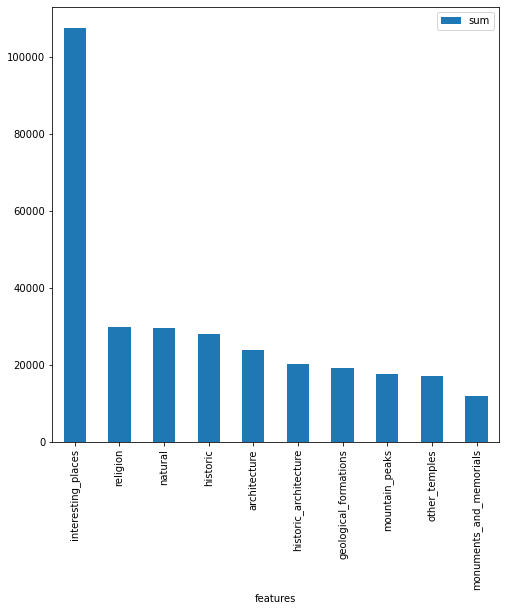

In [20]:
important_places_features.sort_values(by='sum',ascending=False).head(10).plot(kind='bar',x='features',figsize=(8,8))

In [21]:
# sum_features = places_features_df.sum().sort_values(ascending=False)
sum_features = places_features_df.loc[:,(places_features_df.sum() > 20)].sum()
highest_features = places_features_df[sum_features.sort_values(ascending=False).index[:20]]

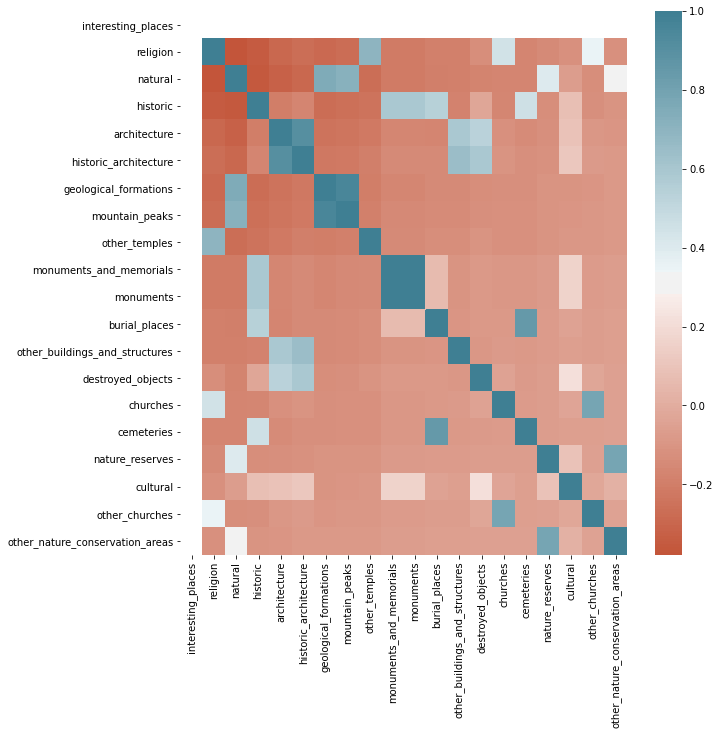

In [22]:
ax,fig = plt.subplots(figsize=(10,10))
sns.heatmap(data=highest_features.corr(), cmap=sns.diverging_palette(20, 220, n=200))


In [24]:
from sklearn.neighbors import NearestNeighbors
p_knn = NearestNeighbors(n_neighbors=20,metric='cosine')
p_knn.fit(places_features_df)

NearestNeighbors(metric='cosine', n_neighbors=20)

In [25]:
p_distances,p_indecies = p_knn.kneighbors(places_features_df)

In [27]:
def get_recommendation(name,k_indecies,k_distances,features_df,df):
    index = np.where(features_df.index == name)
    neighbours =  k_indecies[index].tolist()[0][1:21]
    distance = k_distances[index][0].tolist()
    for i,neighbour in enumerate(neighbours):
            print(df['name'].loc[neighbour],':',1 - distance[i+1])

In [28]:
get_recommendation('Coperto dei Figini',p_indecies,p_distances,places_features_df,places)

Palazzo Branciforte : 1.0
palazzo Cavagnis : 1.0
palazzo Tetta : 1.0
palazzo Querini Papozze : 1.0
Palazzo Zorzi Galeoni : 1.0
palazzo Emo a San Leonardo : 1.0
Palazzo Loredan Gheltoff : 1.0
Fonteghetto della Farina : 1.0
Palazzetto Costantini : 1.0
palazzo da Mosto : 1.0
Palazzo Foscari Contarini : 1.0
Palazzo Longo : 1.0
Palazzo Donà delle rose : 1.0
Palazzo Adoldo : 1.0
Palazzo Labia : 1.0
Palazzo Calbo Crotta : 1.0
Palazzo Flangini : 1.0
Ca' Pisani : 1.0
Palazzo Basadonna Giustinian Recanati : 1.0


In [ ]:
similarity('Palau Episcopal','Phra Racha Wang Derm',places_features_df) 


In [ ]:
tsne_p = TSNE().fit_transform(p_indecies[:1000])

In [ ]:
plt.scatter(tsne_p[:,0],tsne_p[:,1])

In [30]:
import pickle
with open("places_knn.pkl",'wb') as f:
    pickle.dump([p_distances,p_indecies],f)

In [33]:

with open("places_knn.pkl",'rb') as f:
    model = pickle.load(f)

In [36]:
p_distances,p_indecies = model

In [37]:
get_recommendation('Coperto dei Figini',p_indecies,p_distances,places_features_df,places)

Palazzo Branciforte : 1.0
palazzo Cavagnis : 1.0
palazzo Tetta : 1.0
palazzo Querini Papozze : 1.0
Palazzo Zorzi Galeoni : 1.0
palazzo Emo a San Leonardo : 1.0
Palazzo Loredan Gheltoff : 1.0
Fonteghetto della Farina : 1.0
Palazzetto Costantini : 1.0
palazzo da Mosto : 1.0
Palazzo Foscari Contarini : 1.0
Palazzo Longo : 1.0
Palazzo Donà delle rose : 1.0
Palazzo Adoldo : 1.0
Palazzo Labia : 1.0
Palazzo Calbo Crotta : 1.0
Palazzo Flangini : 1.0
Ca' Pisani : 1.0
Palazzo Basadonna Giustinian Recanati : 1.0
